# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

> Again, **don't use ChatGPT for this assignment.** You should be able to memorize the most basic parts of pandas.

## 0) Setup

Import pandas **with the correct name** .

In [261]:
import pandas as pd

## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`. Trying `read_excel` the first time will probably not work, you'll get an error message. Be sure to read the error carefully: *you probably need to install a new library before it will work, and the error tells you what the library is named*. You *might* need to do `Kernel > Restart Kernel...` and run the notebook again from the top in order to get it to work.

In [262]:
!pip install --quiet openpyxl
# Load the data from a Excel file
df = pd.read_excel("richpeople.xlsx")
# Let's look at the first five
df.head()

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
0,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,former chairman and CEO,1955.0,NaN,"television, Univision",represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
1,2014,Abdulla Al Futtaim,687,United Arab Emirates,ARE,2.5,inherited,inherited,male,NaN,...,relation,1930.0,NaN,"auto dealers, investments",company split between him and cousin in 2000,NaN,http://en.wikipedia.org/wiki/Al-Futtaim_Group,http://www.al-futtaim.ae/content/groupProfile.asp,NaN,NaN
2,2014,Abdulla bin Ahmad Al Ghurair,305,United Arab Emirates,ARE,4.8,inherited,inherited,male,NaN,...,relation,1960.0,NaN,diversified,inherited from father,NaN,http://en.wikipedia.org/wiki/Al-Ghurair_Group,http://www.alghurair.com/about-us/our-history,NaN,NaN
3,2014,Abdullah Al Rajhi,731,Saudi Arabia,SAU,2.4,self-made,self-made finance,male,NaN,...,founder,1957.0,NaN,banking,NaN,NaN,http://en.wikipedia.org/wiki/Al-Rajhi_Bank,http://www.alrajhibank.com.sa/ar/investor-rela...,http://www.alrajhibank.com.sa/ar/about-us/page...,NaN
4,2014,Abdulsamad Rabiu,1372,Nigeria,NGA,1.2,self-made,founder non-finance,male,54.0,...,founder,1988.0,NaN,"sugar, flour, cement",NaN,NaN,http://www.forbes.com/profile/abdulsamad-rabiu/,http://www.bloomberg.com/research/stocks/priva...,NaN,NaN


In [263]:
df.keys()

Index(['year', 'name', 'rank', 'citizenship', 'countrycode',
       'networthusbillion', 'selfmade', 'typeofwealth', 'gender', 'age',
       'industry', 'IndustryAggregates', 'region', 'north',
       'politicalconnection', 'founder', 'generationofinheritance', 'sector',
       'company', 'companytype', 'relationshiptocompany', 'foundingdate',
       'gdpcurrentus', 'sourceofwealth', 'notes', 'notes2', 'source',
       'source_2', 'source_3', 'source_4'],
      dtype='object')

## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [264]:
# Display the number of rows and columns in your data. Also display the names and data types of each column.
# print(df.shape)
print(f"columns: {df.shape[1]}, rows: {df.shape[0]}")


columns: 30, rows: 1653


In [265]:
# names and data types of each column
print(df.dtypes)

year                         int64
name                        object
rank                         int64
citizenship                 object
countrycode                 object
networthusbillion          float64
selfmade                    object
typeofwealth                object
gender                      object
age                        float64
industry                    object
IndustryAggregates          object
region                      object
north                        int64
politicalconnection        float64
founder                      int64
generationofinheritance     object
sector                      object
company                     object
companytype                 object
relationshiptocompany       object
foundingdate               float64
gdpcurrentus               float64
sourceofwealth              object
notes                       object
notes2                      object
source                      object
source_2                    object
source_3            

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [266]:
# Sort the data by net worth and display the 10 richest people in the world.
df[['name', 'networthusbillion']].sort_values(by='networthusbillion', ascending=False).head(10)

,name,networthusbillion
184,Bill Gates,76.0
226,Carlos Slim Helu,72.0
79,Amancio Ortega,64.0
1562,Warren Buffett,58.2
862,Larry Ellison,48.0
339,David Koch,40.0
247,Charles Koch,40.0
1364,Sheldon Adelson,38.0
280,Christy Walton,36.7
724,Jim Walton,34.7


## 4a) How many male billionaires are there compared to the number of female billionares?

> **TIP:** This is not a `.groupby`

In [267]:
#df['gender'].value_counts()


In [268]:

# Display the number of rows for male and female billionaires.
num_male_billionaires = df[df["gender"] == "male"].shape[0]
num_female_billionaires = df[df["gender"] == "female"].shape[0]

print(f"number of male billionaires: {num_male_billionaires}")
print(f"number of female billionaires: {num_female_billionaires}")


number of male billionaires: 1473
number of female billionaires: 180


## 4b) What percent is that?

> **TIP:** Doing percentages with the answer to `4a` is so common that there's an extra parameter to automatically calculate it. Look at the documentation!

In [269]:
# Count the numbers of male and female and dipsplay it in percentage
percentages = (df['gender'].value_counts(normalize=True) * 100).round(1)
print(percentages)

gender
male      89.1
female    10.9
Name: proportion, dtype: float64


## 4c) Is the average wealth different for a female billionaire as compared to a male billionaire?

> **TIP:** This one *does* use `.groupby`. You can pick what 'average' means in this context.

In [270]:
# Group the data by net worth and display the mean net worth
df.groupby("gender")[["networthusbillion"]].mean()

,networthusbillion
gender,
female,3.920556
male,3.902716


## 5a) What is the most common source/type of wealth?

In [271]:
# Count types of wealth and display the most common type
# df.groupby("sourceofwealth")["networthusbillion"].sum().sort_values(ascending=False).head(1)

df["typeofwealth"].value_counts().head(1)


typeofwealth
inherited    506
Name: count, dtype: int64

## 5b) Is the most common source/type of wealth different between men and women?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together??? You could also do this as two separate cells where you calculate it separately for men and women.
>
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [272]:
# Count type of wealth for each gender and display the most common type with the highest count
most_common_source_male = df[df["gender"] == "male"]['typeofwealth'].value_counts().idxmax()
most_common_source_female = df[df["gender"] == "female"]['typeofwealth'].value_counts().idxmax()

print(f"Most common type for males: {most_common_source_male}")
print(f"Most common source for females: {most_common_source_female}")


Most common type for males: founder non-finance
Most common source for females: inherited


## 6a) What companies have the most billionaires? Let's see the top five.

> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.

In [273]:
# Display the top 5 most common companies among the billionaires
df["company"].value_counts().head(5)

company
Hyatt                  11
Oetker-Gruppe           8
S. C. Johnson & Son     7
Alfa Group              6
Votorantim Group        6
Name: count, dtype: int64

### 6b) Graph those top 5 as a horizontal bar graph. Make the largest bar be at the top of the graph.

> **TIP:** Just try to throw `.plot()` on the end??
> 
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

<Axes: ylabel='company'>

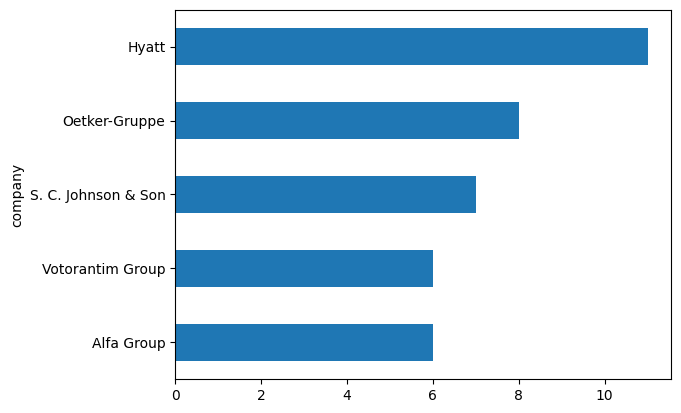

In [274]:
# Display the top 5 most common companies among the billionaires in a bar chart
# df["company"].value_counts().head(5)
df["company"].value_counts().head(5).sort_values(ascending=True).plot(kind='barh')

## 7) How much money do these top 5 billionaires have in total?

> **TIP:** for multiple conditions, you can't use `or` and `and`. In pandas, `|` means *or* and `&` means *and*.
>
> **TIP:** Checking multiple conditions can be done two ways.
> - `(df.colname == 'A') | (df.colname == 'B')`
> - `df.colname.isin(['A', 'B'])`

In [275]:
# Step 1: Identify the top 5 most frequent companies
top_5_companies = df["company"].value_counts().head(5).index
# print(top_5_companies)

# Step 2: Filter the DataFrame for these companies
top_5_companies_df = df[df["company"].isin(top_5_companies)]
# print(top_5_companies_df)

# Step 3: Sum their net worth
total_networth = top_5_companies_df["networthusbillion"].sum()

print(f"Total net worth of the top 5 companies: {total_networth:.2f} billion USD")

Total net worth of the top 5 companies: 120.30 billion USD


## 8) What are the top 10 countries with the most money held by billionaires?
I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

In [276]:
# group by countrycode and sum the net worth
# df.groupby('countrycode')['networthusbillion'].sum()

In [277]:

# Display the top 10 countries with the highest total net worth
top_countries = df.groupby('countrycode')['networthusbillion'].sum().sort_values(ascending=False).head(10)
print(top_countries)


countrycode
USA    2322.4
RUS     422.5
DEU     401.4
CHN     375.8
FRA     235.3
HKG     213.7
BRA     192.2
IND     191.9
ITA     158.1
GBR     152.0
Name: networthusbillion, dtype: float64


## 9a) How old is an average billionaire?

In [278]:
# Display the average age of billionaires
average_billionaire = df['age'].mean()
print(f"average billionaire is {average_billionaire:.1f} years old")

average billionaire is 63.3 years old


## 9b) How old are self-made billionaires compared to non self-made billionaires? 

In [279]:
group_selfmade = df.groupby('selfmade')['age'].mean()
# print(group_selfmade)

print(f"average age of self-made billionaires is {group_selfmade['self-made']:.1f}. average age of non self-made billionaires is {group_selfmade['inherited']:.1f}")

average age of self-made billionaires is 62.6. average age of non self-made billionaires is 65.0


## 10a) Who are the three youngest billionaires? Who are the three oldest?

In [280]:
# Display the youngest three billionaires
df.sort_values(by='age', ascending=True)[['name','age']].head(3)


,name,age
1172,Perenna Kei,24.0
397,Dustin Moskovitz,29.0
1004,Mark Zuckerberg,29.0


In [281]:
# Display the oldest three billionaires
df.sort_values(by='age', ascending=False)[['name','age']].head(3)

,name,age
343,"David Rockefeller, Sr.",98.0
816,Karl Wlaschek,96.0
836,Kirk Kerkorian,96.0


## 10b) Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

<Axes: title={'center': 'Age of Billionaires'}, ylabel='Frequency'>

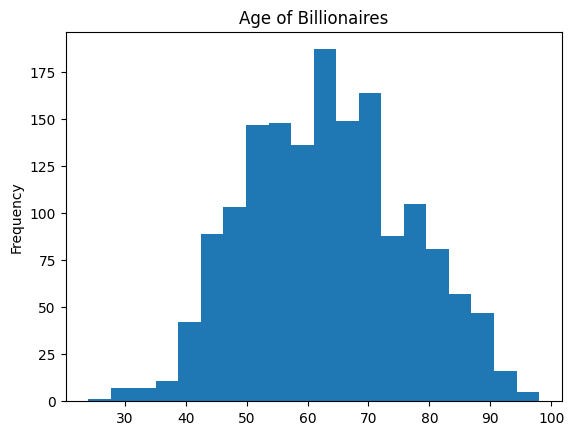

In [282]:
# Display the distribution of the age of billionaires in a histogram
df['age'].plot(kind='hist', bins=20, title='Age of Billionaires')

## 11) Make a scatterplot of net worth compared to age

It's more fun to do this in Altair as compared to matplotlib, but either is fine.

<Axes: title={'center': 'Age of Billionaires'}, xlabel='age', ylabel='networthusbillion'>

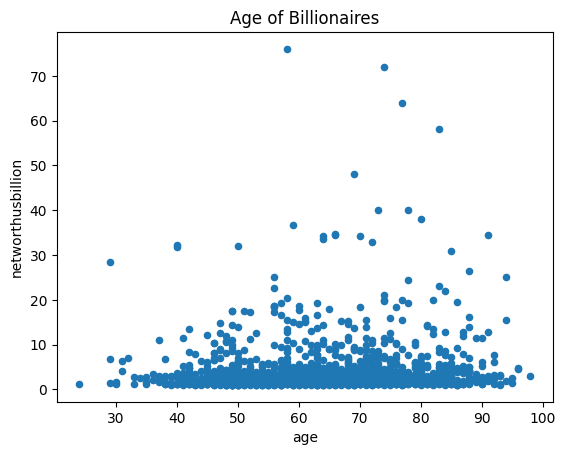

In [283]:
# Scatterplot of age and net worth
df.plot(kind='scatter', x='age', y='networthusbillion', title='Age of Billionaires')

## 13) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

<Axes: title={'center': 'Top 10 Richest Billionaires'}, ylabel='name'>

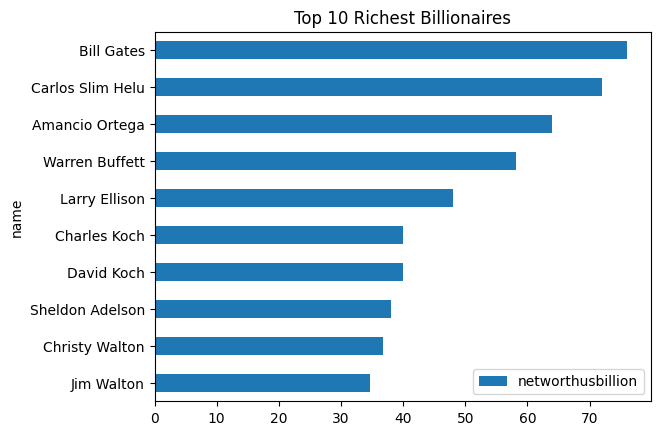

In [284]:

# Top 10 richest billionaires
top_10_richest = df.sort_values(by='networthusbillion', ascending=True).tail(10)

# Plotting
top_10_richest.plot(kind='barh', x='name', y='networthusbillion', title='Top 10 Richest Billionaires')

## 14) Read in the most recent data

I copied and pasted the most recent data from [the original Bloomberg story](https://www.bloomberg.com/billionaires/) (it's in the page's source code), but it all was saved as JSON. Can you use pandas to read in `billionaires.json`?

> **TIP:** If `pd.read_csv` reads a CSV and `pd.read_excel` reads an excel file... what reads in JSON?
>
> **TIP:** It's a lot less complicated than what we did in class.

In [285]:
# Reading the JSON file
df = pd.read_json('billionaires.json')

# Display the first few rows of the DataFrame
df.sort_values

<bound method DataFrame.sort_values of                  commonName commonLastName     citizenship  \
0                 Elon Musk           Musk   United States   
1           Bernard Arnault        Arnault          France   
2                Jeff Bezos          Bezos   United States   
3                Bill Gates          Gates   United States   
4             Larry Ellison        Ellison   United States   
..                      ...            ...             ...   
495  Sofie Kirk Kristiansen    Kristiansen         Denmark   
496     Frits Goldschmeding  Goldschmeding     Netherlands   
497          Austen Cargill        Cargill   United States   
498              John Reece          Reece  United Kingdom   
499        Patrick Collison       Collison         Ireland   

                         slug     industry  personId  rank         worth  \
0                 elon-r-musk   Technology   1954518     1  221116780866   
1           bernard-j-arnault     Consumer   1392853     2  1702